# Probability Distributions

In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binom, chi2, norm

## Bernoulli

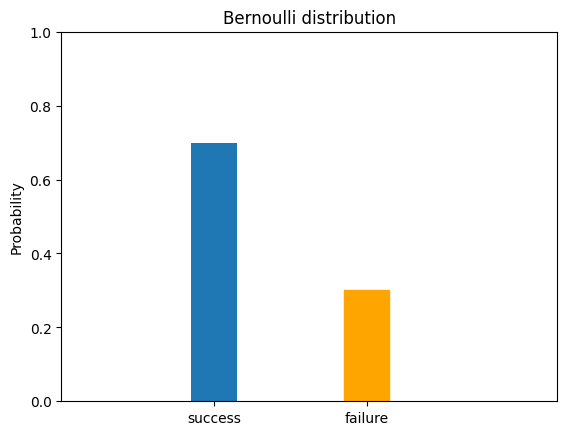

In [135]:
data = {
    'success': 0.7,
    'failure': 0.3
}

x = list(data.keys())
y = list(data.values())

bars = plt.bar(x, y, width=0.3, align='center')
ax = plt.gca()
bars[1].set_color('orange')
ax.set_xlim([-1.,2.25])
ax.set_ylim([0, 1])

plt.ylabel('Probability')
plt.title('Bernoulli distribution')

plt.savefig('./output/bernoulli.png')

## Binomial

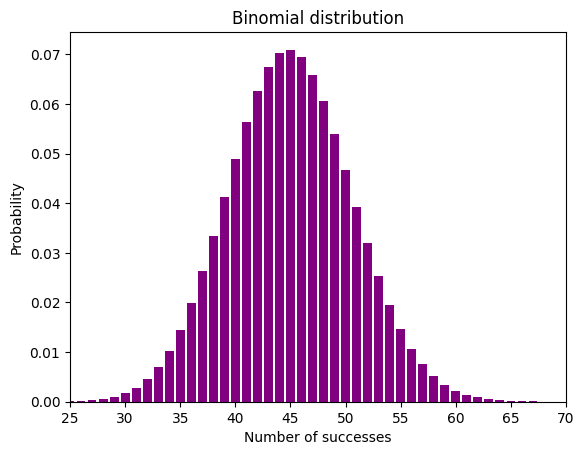

In [142]:
n, p = 150, 0.3
x = range(n + 1)
# dist = [binom.pmf(r, n, p) for r in range(n + 1)]

ax = plt.gca()
plt.bar(x, binom.pmf(x, n, p), color='purple')

plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial distribution')
ax.set_xlim([25, 70])

plt.savefig('./output/binomial.png')

## Uniform

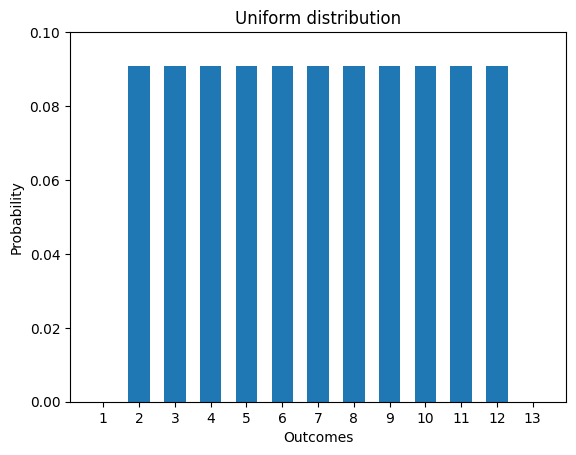

In [146]:
n = 13
dist = [1/11 if (e > 1 and e < 13) else 0 for e in range(1, n + 1)]

ax = plt.gca()
plt.bar(range(1, n + 1), dist, width=0.6)
ax.set_xticks(range(1, n + 1))
ax.set_ylim([0, 0.1])

plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Uniform distribution')

plt.savefig('./output/uniform.png')

## Normal

In [187]:
df = pd.read_csv('./height.csv')

In [188]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [189]:
df.drop(['Index', 'Weight(Pounds)'], axis=1, inplace=True)
df.rename(columns={
    'Height(Inches)': 'height_in_inches'
}, inplace=True)

In [190]:
df['height_in_inches'].round(2)
df['height_in_cm'] = (df['height_in_inches'] * 2.54).round(2)

In [209]:
print(df['height_in_cm'].mean(), df['height_in_cm'].std())

172.70251880000004 4.830287559841856


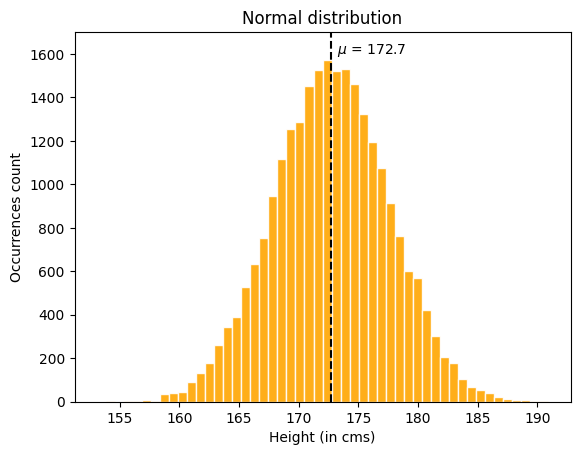

In [207]:
x = df['height_in_cm']
mean = round(df['height_in_cm'].mean(), 2)

fig, ax = plt.subplots()
ax.hist(x, bins=50, color='orange', edgecolor='white', alpha=0.9)
ax.axvline(mean, color='black', linestyle='dashed')
ax.set_ylim([0, 1700])
ax.text(mean + 0.5, 1600, '$\mu$ = {}'.format(mean))

plt.xlabel('Height (in cms)')
plt.ylabel('Occurrences count')
plt.title('Normal distribution')

plt.savefig('./output/normal.png')

## Chi-Squared

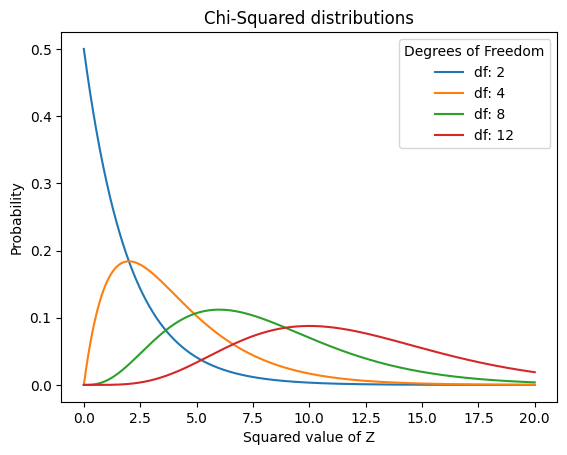

In [96]:
x = np.arange(0, 20, 0.001)

plt.plot(x, chi2.pdf(x, df=2), label='df: 2')
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12')

plt.xlabel('Squared value of Z')
plt.ylabel('Probability')
plt.legend(title='Degrees of Freedom')
plt.title('Chi-Squared distributions')

plt.savefig('./output/chi-squared.png')